In [3]:
import numpy as np
from scipy.signal import fftconvolve as convolve
import astropy.units as u
import matplotlib.pyplot as plt

In [4]:
def get_template(frequency,n_period, binning):
    frequency, binning = frequency.value, binning.to(u.s).value
    duration = 1/frequency * n_period
    x = np.arange(0,duration+binning,binning)
    template = np.sin(frequency*x*2*np.pi)
    return x, template

In [54]:
dt = 0.001*u.s

#template
tt, ty = get_template(frequency=80*u.Hz, n_period=8, binning=dt)

#signal data
t = np.arange(0.001,1.001, dt.value)
# 1/t**2 + t + wiggles + rand. noise
y = 1E-5*1/t**2 + t
temp = np.hstack((ty, np.zeros(int(len(t)-len(ty)))))
y += np.roll(temp, 250)
y += np.random.uniform(-1,1,len(t))*0.25

In [70]:
npcor = np.correlate(y,ty,mode='same')
sciconv = convolve(y,ty,mode='same')

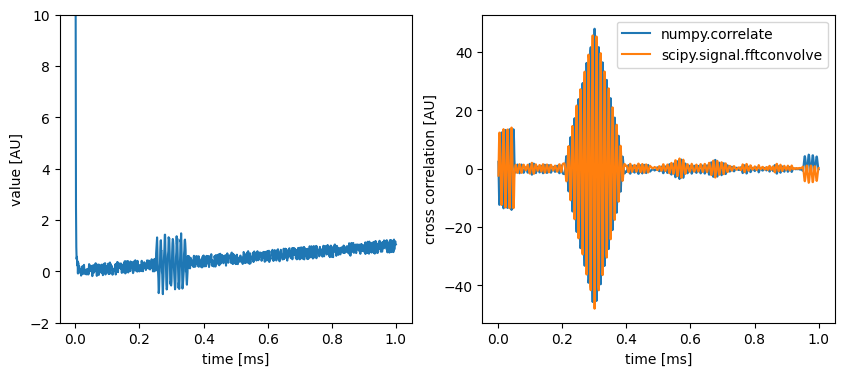

In [71]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(t, y)
#plt.plot(tt+0.250, ty, color = 'red')
ax[0].set_ylim(-2,10)
ax[0].set_xlabel('time [ms]')
ax[0].set_ylabel('value [AU]')

ax[1].plot(t, npcor, label = 'numpy.correlate')
ax[1].plot(t, sciconv, label = 'scipy.signal.fftconvolve')
ax[1].set_xlabel('time [ms]')
ax[1].set_ylabel('cross correlation [AU]')
ax[1].legend()

In [8]:
dt.value

1.0

In [ ]:
np.random.ra